# Projeção de dados alguns dados não sei ainda

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat
import statsmodels.api as sm
from multidata import *

In [13]:
%run ../Limpezas/limpeza_análise_energética.ipynb

## Vector Auto Regression (VAR)

In [14]:
df = MultiData(dict_analise_energetica)

In [15]:
print(df)

Produção_de_Energia_Primária | Produção_de_Energia_Primária_% | Oferta_Interna_de_Energia | Oferta_Interna_de_Energia_% | Consumo_Final_por_Fonte | Consumo_Final_por_Fonte_% | Consumo_Final_por_Setor | Consumo_Final_por_Setor_% | Consumo_Final_Energético_por_Fonte | Consumo_Final_não_Energético_por_Fonte | Dependência_Externa_de_Energia | Composição_Setorial_do_Consumo_de_Derivados_de_Petróleo | Composição_Setorial_do_Consumo_de_Eletricidade | Composição_Setorial_do_Consumo_de_Carvão_Vapor | Composição_Setorial_do_Consumo_Final_de_Biomassa


In [16]:
training_a = df[0]['RENOVÁVEL'][:40]
training_b = df['Consumo_Final_por_Setor']['RESIDENCIAL'][:40]
testing_a = df[0]['RENOVÁVEL'][40:]
testing_b = df['Consumo_Final_por_Setor']['RESIDENCIAL'][40:]
training = pd.concat([training_a, training_b],axis=1)

In [17]:
model = sm.tsa.VAR(np.asarray(training, dtype='float'))
model_fit = model.fit()

In [23]:
prediction = pd.DataFrame(model_fit.forecast(model.endog, steps=14))
last_year = training.index[-1]
prediction.index = [last_year + pd.offsets.DateOffset(years=i) for i in range(len(prediction))]

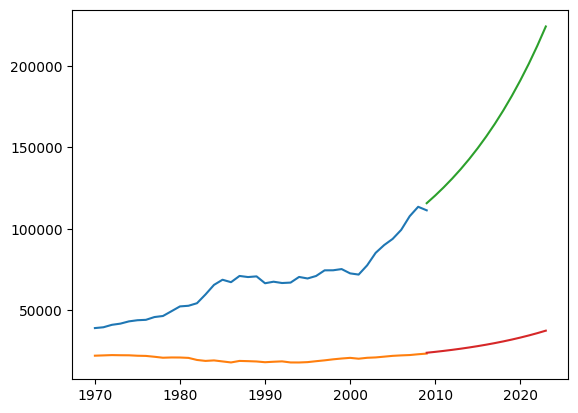

In [26]:
forecast = pd.concat([training, prediction])
plt.plot(forecast)
plt.show()

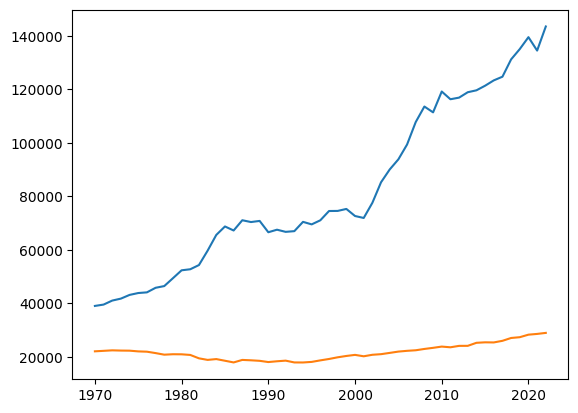

In [28]:
plt.plot(df[0]['RENOVÁVEL'])
plt.plot(df['Consumo_Final_por_Setor']['RESIDENCIAL'])
plt.show()